In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")

import inflect
m = inflect.engine()
from lemminflect import getInflection

from scipy.special import kl_div

import pysmile
pysmile.License((
	b"SMILE LICENSE e42950f2 b58d6fac e3c14a1e "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: cpdxi66bo1rzx2upxofz3qbdv "
	b"Issued for: Solat Jabeen (solatjabeen@yahoo.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2025-04-01 "
	b"Issued by BayesFusion activation server"
	),[
	0xa8,0x81,0x5b,0x93,0xa4,0x03,0x2f,0xeb,0xc4,0xdc,0x59,0x52,0x2c,0x21,0x10,0x6c,
	0xb3,0x9e,0xba,0xdf,0x2d,0x9a,0x04,0x60,0x5a,0x18,0x79,0xc5,0x47,0xfc,0x91,0x47,
	0xbc,0x1a,0x54,0x62,0xc7,0xc8,0x0f,0xc2,0x5c,0x2a,0xdb,0xc6,0x4b,0x3e,0xfe,0x8d,
	0xc0,0x34,0xd5,0x3d,0xc4,0xed,0x58,0x1c,0x36,0xda,0xa9,0x37,0x9f,0x15,0x55,0x35])

In [2]:
dagCauseSents = []

edge1 = './Text/X1toY.txt'
narrative = open(edge1, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
dagCauseSents.append(narrative)

edge2 = './Text/X2toY.txt'
narrative = open(edge2, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
dagCauseSents.append(narrative)

edge3 = './Text/U1toY.txt'
narrative = open(edge3, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
dagCauseSents.append(narrative)

edge4 = './Text/U2toY.txt'
narrative = open(edge4, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
dagCauseSents.append(narrative)

In [3]:
import csv 

dagCauseTriples = []
dagCauseVerbs = []

csv_filename = './Text/Test_Water_CT.txt'
with open(csv_filename) as f:
    reader = csv.reader(f)
    dagCauseTriples = list(tuple(line) for line in reader)
    
for s in dagCauseTriples:
    dagCauseVerbs.append(s[1])

In [4]:
for i,j,k in zip(dagCauseSents,dagCauseTriples,dagCauseVerbs):
    print(i,j,k)

the upper layer consists of factors contributing to the major causes of the problem. for instance, the factor "weak physical access-control" contributes to "sensor (s1) sends incorrect water level measurements" due to intentional attack. ('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') influences
"sensor data integrity verification" is a major cause for "sensor (s1) sends incorrect water level measurements". ('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') causes
"lack of physical maintenance" contributes to "sensor (s1) sends incorrect water level measurements" due to accidental technical failure. ('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') influences
"well-written maintenance procedure" is a major cause for "sensor (s1) sends incorrect water level measurements". ('Well-written maintenance procedure', 'causes', 'Sensor

Nodes: 5
Edges: 4
Weak physical access-control , Sensor (S1) sends incorrect water level measurements
Lack of physical maintenance , Sensor (S1) sends incorrect water level measurements
Sensor data integrity verification , Sensor (S1) sends incorrect water level measurements
Well-written maintenance procedure , Sensor (S1) sends incorrect water level measurements


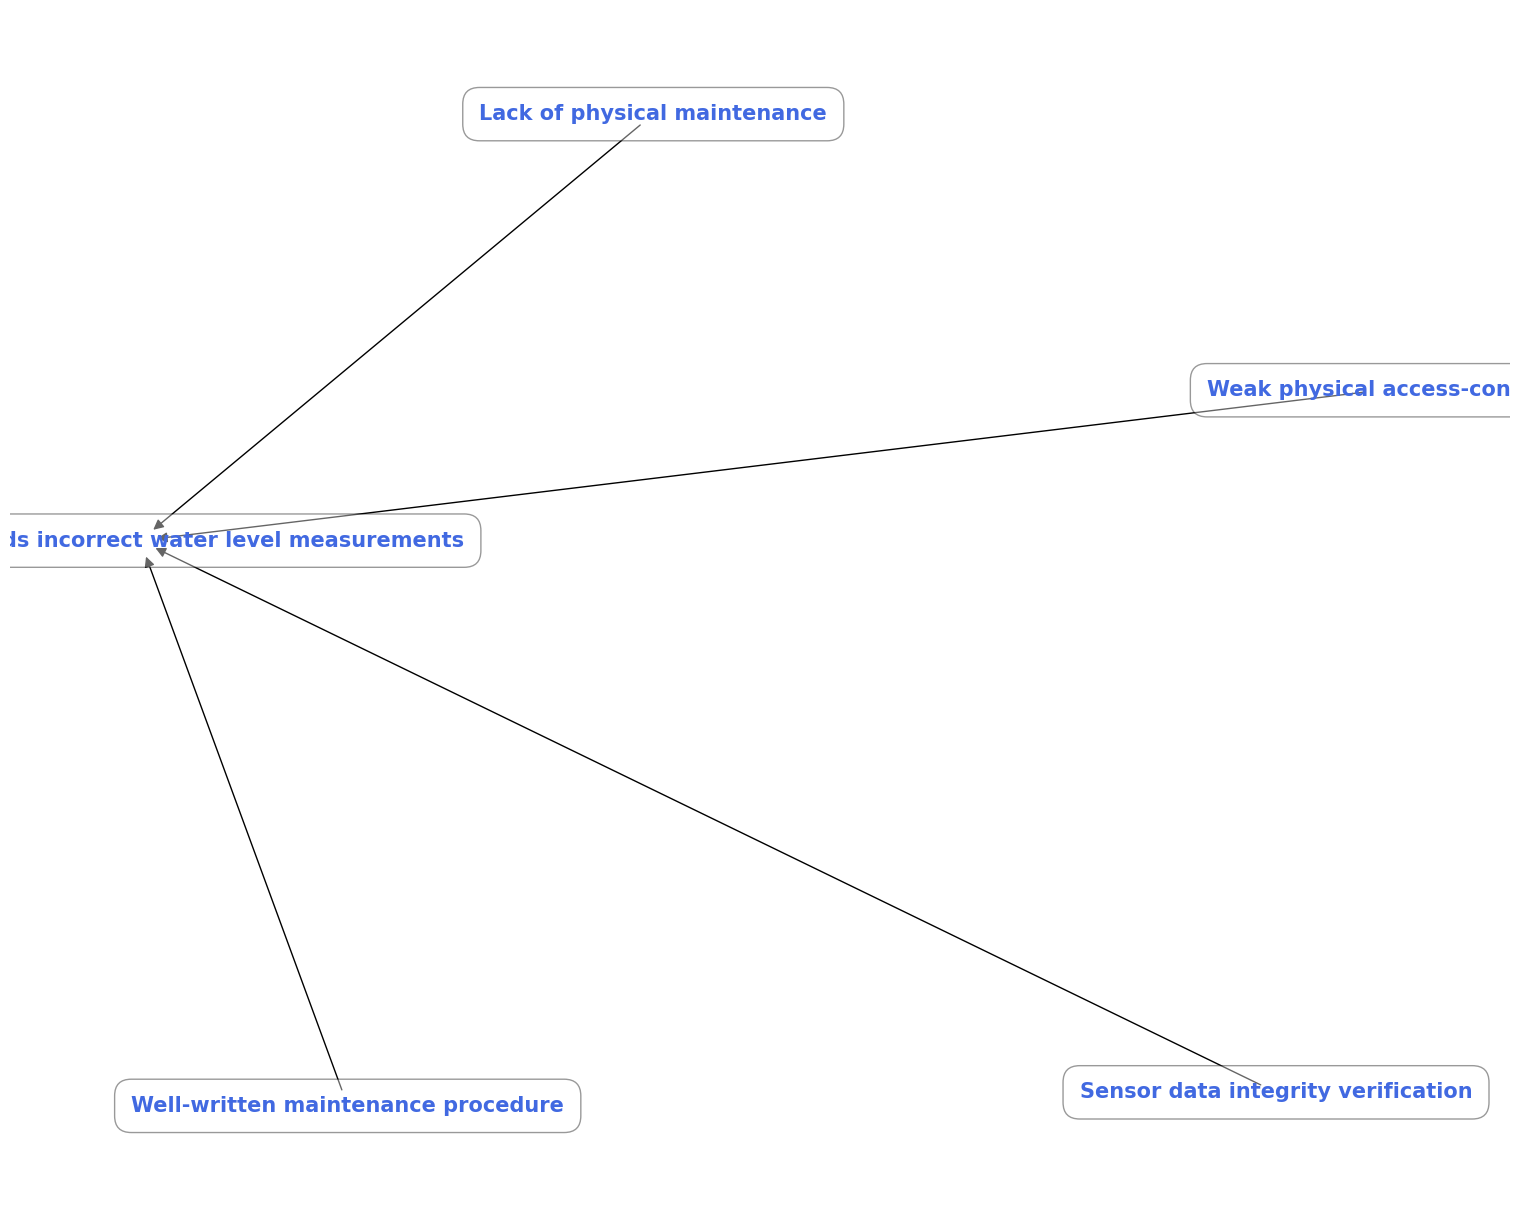

In [5]:
cg = nx.DiGraph()
cg.add_node("Sensor (S1) sends incorrect water level measurements",id = str("Sensor (S1) sends incorrect water level measurements"),title=str("Sensor (S1) sends incorrect water level measurements"),x=615,y=200)
cg.add_node("Weak physical access-control",id = str("Weak physical access-control"),title=str("Weak physical access-control"),x=615,y=200)
cg.add_node("Lack of physical maintenance",id = str("Lack of physical maintenance"),title= str("Lack of physical maintenance"),x=615,y=200)
cg.add_node("Sensor data integrity verification",id = str("Sensor data integrity verification"),title=str("Sensor data integrity verification"),x=615,y=200)
cg.add_node("Well-written maintenance procedure",id = str("Well-written maintenance procedure"),title=str("Well-written maintenance procedure"),x=615,y=200)

cg.add_edge("Weak physical access-control", "Sensor (S1) sends incorrect water level measurements")
cg.add_edge("Lack of physical maintenance", "Sensor (S1) sends incorrect water level measurements")
cg.add_edge("Sensor data integrity verification", "Sensor (S1) sends incorrect water level measurements")
cg.add_edge("Well-written maintenance procedure", "Sensor (S1) sends incorrect water level measurements")

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))

for e in cg.edges(data=True):
    print(e[0],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [6]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        encoded_input = tokenizer(str(sent), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen.append(score)
            # allen.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen.append(scores[2])
            # allen.append(1)
        else:
            # allen.append(scores[1])
            allen.append(0)
    return allen

In [7]:
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn.append(score)
    return afinn

In [8]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        compound = round(compound,3)
        vader.append(compound)
    return vader

In [9]:
def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='scale')
        #print(result)
        result = result[0]/4
        result = round(result,3)
        sentiStrength.append(result)
    return sentiStrength

In [10]:
allen = Allen_sents_SentLevel(dagCauseSents)
afinn = Afinn_sents_SentLevel(dagCauseSents)
vader = Vader_sents_SentLevel(dagCauseSents)
sentiStrength = Senti_sents_SentLevel(dagCauseSents)

df_CSW = pd.DataFrame(list(zip(dagCauseSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'HuggingFace','Afinn','Vader','SentiStrength'])

df_CSW["Weight"] = df_CSW.sum(axis=1)

for i in df_CSW.index:
    count = 0
    if df_CSW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CSW["Afinn"][i] != 0:
        count = count + 1
    if df_CSW["Vader"][i] != 0:
        count = count + 1
    if df_CSW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CSW["Weight"][i] = round(df_CSW["Weight"][i]/count,3)

sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df_CSW.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CSW["Polarity"] = sentPolarity
df_CSW.style

c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Sentence,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,"the upper layer consists of factors contributing to the major causes of the problem. for instance, the factor ""weak physical access-control"" contributes to ""sensor (s1) sends incorrect water level measurements"" due to intentional attack.",-0.678000,-1.000000,-0.827000,-0.500000,-0.751000,Strong Negative
1,"""sensor data integrity verification"" is a major cause for ""sensor (s1) sends incorrect water level measurements"".",-0.744000,0.400000,0.382000,-0.250000,-0.053000,Weak Negative
2,"""lack of physical maintenance"" contributes to ""sensor (s1) sends incorrect water level measurements"" due to accidental technical failure.",-0.828000,-1.000000,-0.710000,-0.500000,-0.760000,Strong Negative
3,"""well-written maintenance procedure"" is a major cause for ""sensor (s1) sends incorrect water level measurements"".",-0.767000,0.000000,0.000000,-0.250000,-0.508000,Moderate Negative


In [11]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    token_list = []
   
    for sent in causalSentences:
        tokens = word_tokenize(str(sent))
        tags = pos_tag(tokens)
        token_tuple = []
        for token,tag in tags:
            if str(token) not in marks:
                if str(token) not in stopwords.words() or tag in tagsList:
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list

In [12]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        # print(tokenTuple)
        for token in tokenTuple:
            # print(token)
            encoded_input = tokenizer(str(token), return_tensors='pt')
            output = model(**encoded_input)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            if scores[0] > scores[1] and scores[0] > scores[2]:
                score = scores[0] * -1
                score = round(score,3)
                allen_tuple.append(score)
            elif scores[2] > scores[1] and scores[2] > scores[0]:
                scores[2] = round(scores[2],3)
                allen_tuple.append(scores[2])
            else:
                # allen_tuple.append(scores[1])
                allen_tuple.append(0)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

In [13]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            score = afn.score(str(token))
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            score = score/5
            score = round(score,3)
            afinn_tuple.append(score)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

In [14]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            compound = round(compound,3)
            vader_tuple.append(compound)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

In [15]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        for token in tokenTuple:
            result = senti.getSentiment(str(token), score='scale')
                #print(result)
            result = result[0]/4
            result = round(result,3)
            senti_tuple.append(result)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word

In [16]:
token_list = GenerateTokens(dagCauseSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(dagCauseSents)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

    
df1 = pd.DataFrame(list(zip(dagCauseSents,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,sentsWeight_TokenLevel,SentencePolarity_list)), 
                      columns =['Causal Sentence', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])

df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Sentence'] = ""
        row['Sentence Weight'] = ""
        row['Sentence Polarity'] = ""
    prev = index
df1.style

,Causal Sentence,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Sentence Weight,Sentence Polarity
0,"the upper layer consists of factors contributing to the major causes of the problem. for instance, the factor ""weak physical access-control"" contributes to ""sensor (s1) sends incorrect water level measurements"" due to intentional attack.",upper,0,0.000000,0.000000,0.000000,0.000000,Neutral,[-1],['Strong Negative']
0,,layer,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,consists,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,factors,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,contributing,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,major,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,problem,-0.488000,-0.400000,-0.402000,-0.250000,-0.385000,Moderate Negative,,
0,,instance,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,factor,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,``,0,0.000000,0.000000,0.000000,0.000000,Neutral,,


In [17]:
sentencePolarity_list = []
sentWeight_TokenLevel = []
for i,j in zip (sentsWeight_TokenLevel,SentencePolarity_list):
    sentWeight_TokenLevel.append(i[0]) 
    sentencePolarity_list.append(j[0]) 
    
df_CST = pd.DataFrame(list(zip(sentWeight_TokenLevel, sentencePolarity_list)), columns =['Weight','Polarity'])
df_CST.style

,Weight,Polarity
0,-1.000000,Strong Negative
1,0.063000,Weak Positive
2,-1.000000,Strong Negative
3,0.340000,Moderate Positive


In [18]:
allen = []
for sent in dagCauseTriples:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
        # allen.append(-1)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
        # allen.append(1)
    else:
        # allen.append(scores[1])
        allen.append(0)
    
for causalSentence, polarity  in zip(dagCauseTriples, allen):
    print(causalSentence, polarity)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.799
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') 0
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.798
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') 0


In [19]:
afinn = []
for sent in dagCauseTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
for causalSentence, polarity  in zip(dagCauseTriples, afinn):
    print(causalSentence, polarity)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.4
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') 0.4
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.4
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') 0.0


In [20]:
vader = []

def vadersentimentanalysis(review):
    # negpos = []
    vs = analyzer.polarity_scores(review)
    return vs['compound']
for sent in dagCauseTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    # print(compound)
    compound = round(compound,3)
    vader.append(compound)
    # vader_analysis(compound)
    
for causalSentence, polarity  in zip(dagCauseTriples, vader):
    print(causalSentence, polarity)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.44
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') 0.382
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.318
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') 0.0


In [21]:
sentiStrength = []

for sent in dagCauseTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='scale')
    # print(result)
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    
for causalSentence, polarity  in zip(dagCauseTriples, sentiStrength):
    print(causalSentence, polarity)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.25
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') -0.25
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') -0.25
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') -0.25


In [22]:
df_CTW = pd.DataFrame(list(zip(dagCauseTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'HuggingFace','Afinn','Vader','SentiStrength'])
df_CTW["Weight"] = df_CTW.sum(axis=1)

for i in df_CTW.index:
    count = 0
    if df_CTW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CTW["Afinn"][i] != 0:
        count = count + 1
    if df_CTW["Vader"][i] != 0:
        count = count + 1
    if df_CTW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CTW["Weight"][i] = round(df_CTW["Weight"][i]/count,3)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df_CTW.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CTW["Polarity"] = sentPolarity
df_CTW.style

c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Causal Triple,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,"('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements')",-0.799000,-0.400000,-0.440000,-0.250000,-0.472000,Moderate Negative
1,"('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements')",0.000000,0.400000,0.382000,-0.250000,0.177000,Weak Positive
2,"('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements')",-0.798000,-0.400000,-0.318000,-0.250000,-0.442000,Moderate Negative
3,"('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements')",0.000000,0.000000,0.000000,-0.250000,-0.250000,Weak Negative


In [23]:
allen_word = []
allen_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        # print(token)
        encoded_input = tokenizer(str(token), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        # print(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen_tuple.append(score)
            # allen_tuple.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen_tuple.append(scores[2])
            # allen_tuple.append(1)
        else:
            # allen_tuple.append(scores[1])
            allen_tuple.append(0)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a,b in zip(dagCauseTriples,allen_word):
    print(a,b)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.924, 0, -0.662]
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0, 0, -0.662]
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.861, 0, -0.662]
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0.577, 0, -0.662]


In [24]:
afinn_word = []
afinn_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        score = afn.score(str(token))
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn_tuple.append(score)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a,b in zip(dagCauseTriples,afinn_word):
    print(a,b)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.4, 0.0, 0.0]
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0.4, 0.0, 0.0]
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.4, 0.0, 0.0]
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0.0, 0.0, 0.0]


In [25]:
vader_word = []
vader_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        compound = round(compound,3)
        vader_tuple.append(compound)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a,b in zip(dagCauseTriples,vader_word):
    print(a,b)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.44, 0.0, 0.0]
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0.382, 0.0, 0.0]
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.318, 0.0, 0.0]
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0.0, 0.0, 0.0]


In [26]:
senti_word = []
senti_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        result = senti.getSentiment(str(token), score='scale')
            #print(result)
        result = result[0]/4
        result = round(result,3)
        senti_tuple.append(result)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a,b in zip(dagCauseTriples,senti_word):
    #print(len(a))
    print(a,b)

('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.25, 0.0, -0.25]
('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0.0, 0.0, -0.25]
('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements') [-0.25, 0.0, -0.25]
('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements') [0.0, 0.0, -0.25]


In [27]:
#new

sum_list = []
sum_tup = []
limit= len(dagCauseTriples)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

token_list = []
for i in dagCauseTriples:
    dummy = []
    for j in i:
        dummy.append(str(j))
    token_list.append(dummy)
    
df1 = pd.DataFrame(list(zip(dagCauseTriples,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,triplesWeight_TokenLevel, triplePolarity_list)), 
                      columns =['Causal Triple', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])

# df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)
df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Triple'] = ""
        row['Triple Weight'] = ""
        row['Triple Polarity'] = ""
    prev = index
df1.style

,Causal Triple,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Triple Weight,Triple Polarity
0,"('Weak physical access-control', 'influences', 'Sensor (S1) sends incorrect water level measurements')",Weak physical access-control,-0.924000,-0.400000,-0.440000,-0.250000,-0.504000,Moderate Negative,[-0.96],['Strong Negative']
0,,influences,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,Sensor (S1) sends incorrect water level measurements,-0.662000,0.000000,0.000000,-0.250000,-0.456000,Moderate Negative,,
1,"('Sensor data integrity verification', 'causes', 'Sensor (S1) sends incorrect water level measurements')",Sensor data integrity verification,0,0.400000,0.382000,0.000000,0.391000,Moderate Positive,[-0.065],['Weak Negative']
1,,causes,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,,Sensor (S1) sends incorrect water level measurements,-0.662000,0.000000,0.000000,-0.250000,-0.456000,Moderate Negative,,
2,"('Lack of physical maintenance', 'influences', 'Sensor (S1) sends incorrect water level measurements')",Lack of physical maintenance,-0.861000,-0.400000,-0.318000,-0.250000,-0.457000,Moderate Negative,[-0.913],['Strong Negative']
2,,influences,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
2,,Sensor (S1) sends incorrect water level measurements,-0.662000,0.000000,0.000000,-0.250000,-0.456000,Moderate Negative,,
3,"('Well-written maintenance procedure', 'causes', 'Sensor (S1) sends incorrect water level measurements')",Well-written maintenance procedure,0.577,0.000000,0.000000,0.000000,0.577000,Moderate Positive,[0.121],['Weak Positive']


In [28]:
triplesPolarity_list = []
tripleWeight_TokenLevel = []
for i,j in zip(triplesWeight_TokenLevel,triplePolarity_list):
    tripleWeight_TokenLevel.append(i[0])
    triplesPolarity_list.append(j[0]) 
    
df_CTT = pd.DataFrame(list(zip(tripleWeight_TokenLevel, triplesPolarity_list)), columns =['Weight','Polarity'])
df_CTT.style

,Weight,Polarity
0,-0.960000,Strong Negative
1,-0.065000,Weak Negative
2,-0.913000,Strong Negative
3,0.121000,Weak Positive


In [48]:
# weights = df_CSW["Weight"].tolist()
# polarities = df_CSW["Polarity"].tolist()

# weights = df_CST["Weight"].tolist()
# polarities = df_CST["Polarity"].tolist()

# weights = df_CTW["Weight"].tolist()
# polarities = df_CTW["Polarity"].tolist()

weights = df_CTT["Weight"].tolist()
polarities = df_CTT["Polarity"].tolist()

Nodes: 5
Edges: 4
Weak physical access-control , {'predicate': 'Strong Negative'} , Sensor (S1) sends incorrect water level measurements
Lack of physical maintenance , {'predicate': 'Weak Negative'} , Sensor (S1) sends incorrect water level measurements
Sensor data integrity verification , {'predicate': 'Strong Negative'} , Sensor (S1) sends incorrect water level measurements
Well-written maintenance procedure , {'predicate': 'Weak Positive'} , Sensor (S1) sends incorrect water level measurements


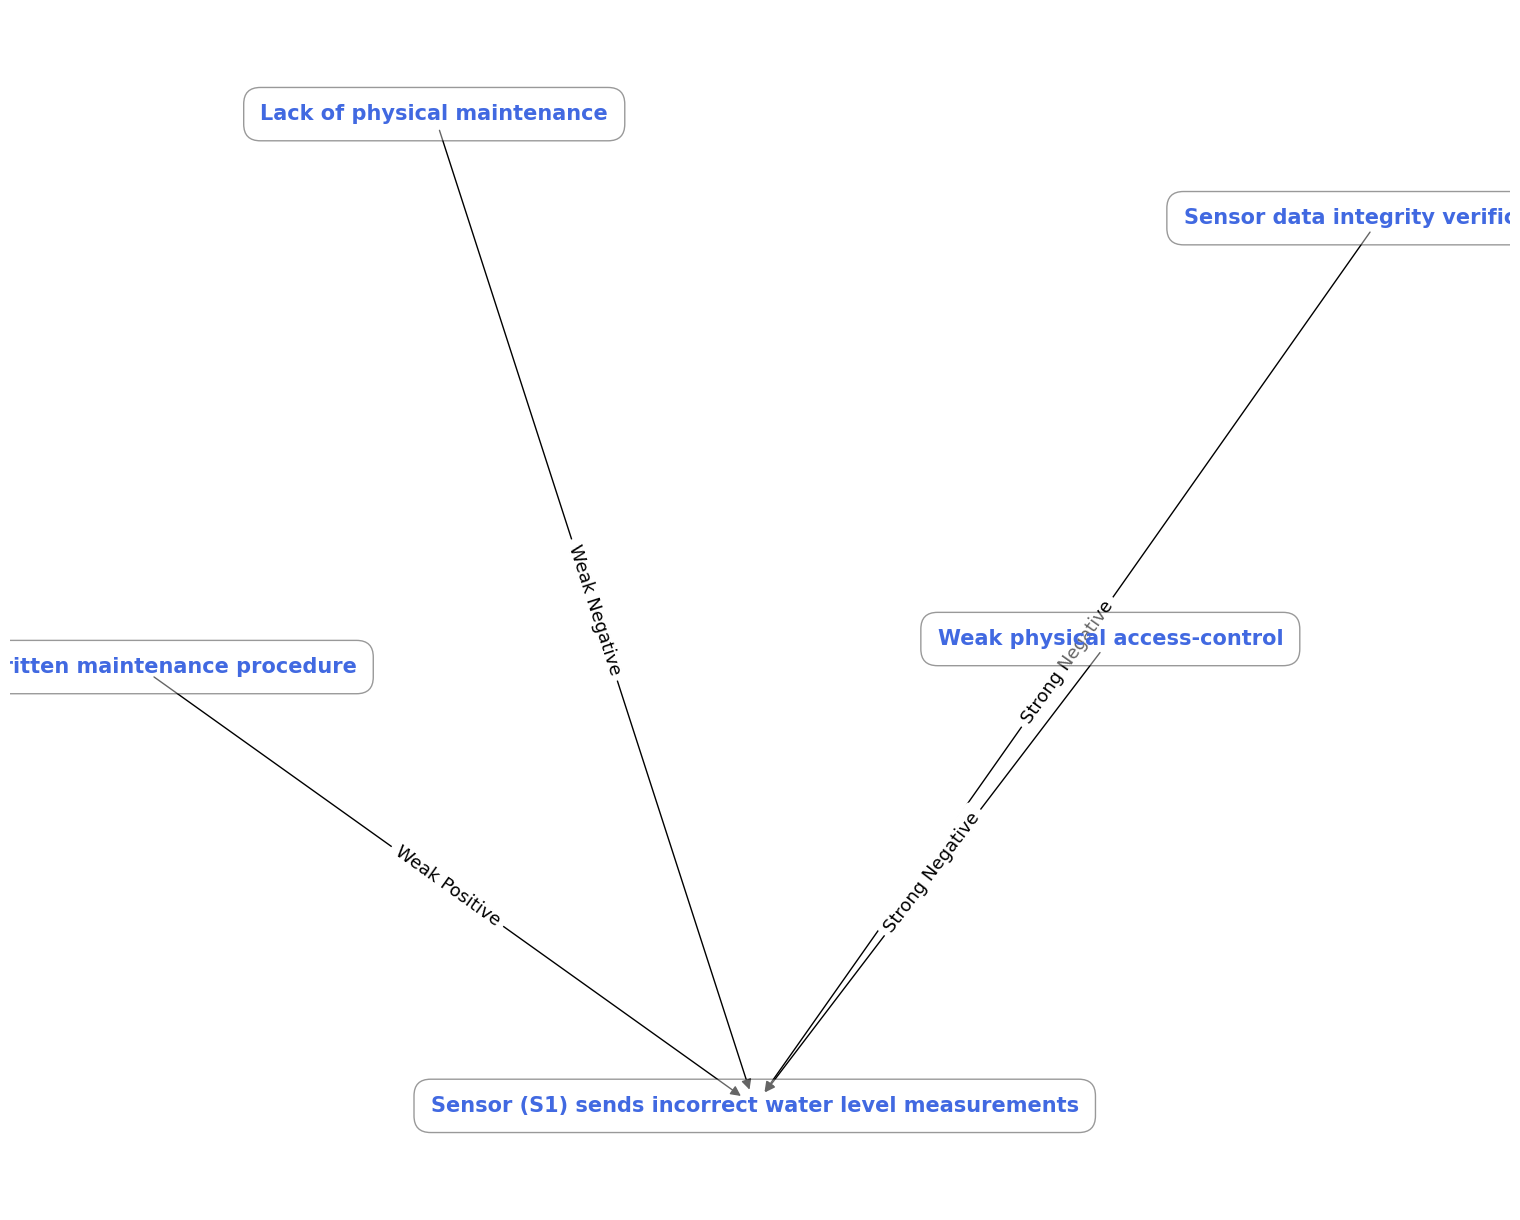

In [49]:
cwg = nx.DiGraph()

cwg.add_node("Sensor (S1) sends incorrect water level measurements",id = str("Sensor (S1) sends incorrect water level measurements"),title=str("Sensor (S1) sends incorrect water level measurements"),x=615,y=200)
cwg.add_node("Weak physical access-control",id = str("Weak physical access-control"),title=str("Weak physical access-control"),x=615,y=200)
cwg.add_node("Lack of physical maintenance",id = str("Lack of physical maintenance"),title= str("Lack of physical maintenance"),x=615,y=200)
cwg.add_node("Sensor data integrity verification",id = str("Sensor data integrity verification"),title=str("Sensor data integrity verification"),x=615,y=200)
cwg.add_node("Well-written maintenance procedure",id = str("Well-written maintenance procedure"),title=str("Well-written maintenance procedure"),x=615,y=200)

cwg.add_edge("Weak physical access-control", "Sensor (S1) sends incorrect water level measurements",predicate=-0.751)
cwg.add_edge("Lack of physical maintenance", "Sensor (S1) sends incorrect water level measurements",predicate=-0.76)
cwg.add_edge("Sensor data integrity verification", "Sensor (S1) sends incorrect water level measurements",predicate=-0.053)
cwg.add_edge("Well-written maintenance procedure", "Sensor (S1) sends incorrect water level measurements",predicate=-0.508)

sources = ["Weak physical access-control","Lack of physical maintenance", "Sensor data integrity verification","Well-written maintenance procedure"]

destinations = ["Sensor (S1) sends incorrect water level measurements", "Sensor (S1) sends incorrect water level measurements", "Sensor (S1) sends incorrect water level measurements", "Sensor (S1) sends incorrect water level measurements"]

for s,d,p in zip(sources,destinations, polarities):
    cwg.add_edge(s, d, predicate=p)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [50]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1
                                

def GetCAstLogicStrength(polarity):
    if polarity == "Strong Negative":
        return -0.9
    elif polarity == "Moderate Negative":
        return -0.6
    elif polarity == "Mild Negative":
        return -0.6
    elif polarity == "Weak Negative":
        return -0.3
    elif polarity == "Neutral":
        return 0.1
    elif polarity == "Weak Positive":
        return 0.3
    elif polarity == "Mild Positive":
        return 0.6
    elif polarity == "Moderate Positive":
        return 0.6
    elif polarity == "Strong Positive":
        return 0.9

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                #polarity = eattr
                                polarity = GetCAstLogicStrength(eattr)
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:Sensor (S1) sends incorrect water level measurements
['True', 'False']
Number of Parents:4
Names of Parents:['Weak physical access-control', 'Lack of physical maintenance', 'Sensor data integrity verification', 'Well-written maintenance procedure']
totalCols:16
j: 0
From Dummy: (1, 1, 1, 1)
Parent: Weak physical access-control
Polarity: -0.9
p: 0
Parent: Lack of physical maintenance
Polarity: -0.3
p: 1
Parent: Sensor data integrity verification
Polarity: -0.9
p: 2
Parent: Well-written maintenance procedure
Polarity: 0.3
p: 3
j: 1
From Dummy: (1, 1, 1, 0)
Parent: Weak physical access-control
Polarity: -0.9
p: 0
Parent: Lack of physical maintenance
Polarity: -0.3
p: 1
Parent: Sensor data integrity verification
Polarity: -0.9
p: 2
Parent: Well-written maintenance procedure
Polarity: 0.3
p: 3
New Polarity: 0
j: 2
From Dummy: (1, 1, 0, 1)
Parent: Weak physical access-control
Polarity: -0.9
p: 0
Parent: Lack of physical maintenance
Polarity: -0.3
p: 1
Parent: Sensor data integr

In [51]:
P = PDs
Q = [[0.09, 0.91], [0.04, 0.96], [0.50, 0.50], [0.29, 0.71], [0.10, 0.90], [0.05, 0.95],[0.68,0.32],[0.34,0.66],[0.15,0.85],[0.01,0.99],[0.15,0.85],[0.50,0.50],[0.05,0.95],[0.03,0.97],[0.25,0.75],[0.18,0.82]]
print(len(P))
print(P)
print(len(Q))
print(Q)

16
[[0.001, 0.999], [0.001, 0.999], [0.01, 0.99], [0.007, 0.993], [0.001, 0.999], [0.001, 0.999], [0.014, 0.986], [0.01, 0.99], [0.01, 0.99], [0.007, 0.993], [0.1, 0.9], [0.07, 0.93], [0.014, 0.986], [0.01, 0.99], [0.37, 0.63], [0.1, 0.9]]
16
[[0.09, 0.91], [0.04, 0.96], [0.5, 0.5], [0.29, 0.71], [0.1, 0.9], [0.05, 0.95], [0.68, 0.32], [0.34, 0.66], [0.15, 0.85], [0.01, 0.99], [0.15, 0.85], [0.5, 0.5], [0.05, 0.95], [0.03, 0.97], [0.25, 0.75], [0.18, 0.82]]


In [53]:
kl = []
for i in range(0,len(P)):
    k = kl_div(Q[i],P[i])
    kl.append(k.sum())

kl = np.array(kl)
kl_divergence = round((kl.sum())/5,3)
print(kl_divergence)

1.536
